# 라이브러리 

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2
import dlib

# 얼굴 검출

In [4]:
image_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/face.jpg'
sticker_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/cat.png'
model_path = os.getenv(
    'HOME')+'/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'


In [5]:
img_bgr = cv2.imread(image_path)
img_show = img_bgr.copy()
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

In [6]:
detector_hog = dlib.get_frontal_face_detector()
dlib_rects = detector_hog(img_rgb, 1)
print(dlib_rects)


rectangles[[(290, 379) (557, 647)]]


In [7]:
for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

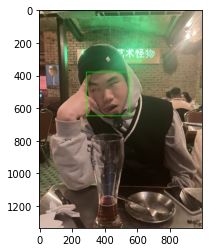

In [8]:
img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

# 랜드마크 localization


In [9]:
landmark_predictor = dlib.shape_predictor(model_path)

In [10]:
list_landmarks = []
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

In [11]:
for landmark in list_landmarks:
    for idx, point in enumerate(list_points):
        cv2.circle(img_show, point, 3, (0, 255, 255), -1) 

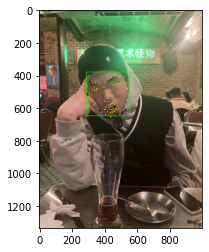

In [12]:
img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

# 스티커

In [13]:
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    x = landmark[2][0]
    y = landmark[36][1]
    w = (landmark[30][0] - x)*2
    h = landmark[48][1] - y


In [14]:
print(dlib_rect)
print ('(x,y) : (%d,%d)'%(x,y))
print ('(w,h) : (%d,%d)'%(w,h))

[(290, 379) (557, 647)]
(x,y) : (320,492)
(w,h) : (196,117)


# Cat


In [15]:
img_sticker = cv2.imread(sticker_path)
img_sticker = cv2.resize(img_sticker, (w,h))
print (img_sticker.shape)

(117, 196, 3)


In [16]:
sticker_area = img_bgr[y:y+img_sticker.shape[0], x:x+img_sticker.shape[1]]


In [17]:
img_bgr[y:y+img_sticker.shape[0], x:x+img_sticker.shape[1]] = \
    np.where(img_sticker == 255, sticker_area, img_sticker).astype(np.uint8)


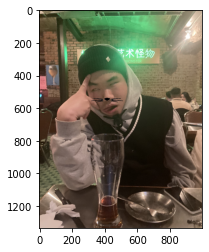

In [18]:
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()
